Author: Prince Appiah
    
Date: 1/17/2025
    
Description: This project was created as part of my final assignment for the Data Visualization with Python course on Coursera.

# Create visualizations using Matplotib, Seaborn and Folium

# Table of Contents
1. [Objectives](#Objectives)
2. [Setup](#Setup)
3. [Installing Required Libraries](#Installing-Required-Libraries)
4. [Importing Required Libraries](#Importing-Required-Libraries)
5. [Scenario](#Scenario)
6. [Data Description](#Data-Description)
7. [Importing Data](#Importing-Data)
8. [Creating Visualizations for Data Analysis](#Creating-Visualizations-for-Data-Analysis)

## Objectives
[Back to Top](#Table-of-Contents)

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations

## Setup
[Back to Top](#Table-of-Contents)

We will be using the following libraries:
- pandas for managing the data.
- numpy for mathematical operations.
- matplotlib for plotting.
- seaborn for plotting.
- Folium for plotting.

## Installing Required Libraries
[Back to Top](#Table-of-Contents)

All Libraries required for this project are listed below in the code cell. The libraries pre-installed on my Jupyter are commented.To install these libraries, remove the # sign before !pip. 
Note: If your environment doesn’t support !pip install, use an alternative method to install the 
required package, such as using a system-specific package manager or installing it manually.

In [ ]:
# !pip install pandas
# !pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install folium

## Importing Required Libraries
[Back to Top](#Table-of-Contents)

I recommend you import all required libraries in one place (here):

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Scenario
[Back to Top](#Table-of-Contents)

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.
- recession period 1 - year 1980
- recession period 2 - year 1981 to 1982
- recession period 3 - year 1991
- recession period 4 - year 2000 to 2001
- recession period 5 - year end 2007 to mid 2009
- recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

## Data Description
[Back to Top](#Table-of-Contents)

Data Description
The dataset used for this visualization assignment contains historical_automobile_sales data representing automobile sales and related variables during recession and non-recession period.
The dataset includes the following variables:
- Date: The date of the observation.
- Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
- Automobile_Sales: The number of vehicles sold during the period.
- GDP: The per capita GDP value in USD.
- Unemployment_Rate: The monthly unemployment rate.
- Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
- Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
- Price: The average vehicle price during the period.
- Advertising_Expenditure: The advertising expenditure of the company.
- Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
- Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
- Month: Month of the observation extracted from Date..
- Year: Year of the observation extracted from Date.
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

## Importing Data
[Back to Top](#Table-of-Contents)


In [2]:
df = pd.read_csv("historical_automobile_sales.csv")
print(df.shape)

(528, 15)


There are 15 columns/variables and 528 observations/rows.

In [3]:
df.describe()

# This generates a summary of statistical measures for the numerical columns in the DataFrame df.

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns
#This displays all the column labels (names) of the DataFrame, allowing you to see the structure of the data.

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

----

----

## Creating Visualizations for Data Analysis
[Back to Top](#Table-of-Contents)

**TASK 1.1** 
First we develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.
    
**Next, we include the following on the plot**
- ticks on x- axis with all the years, to identify the years of recession
- annotation for at least two years of recession
- Title as Automobile Sales during Recession

We created the list for the range 1980 till 2023 and pass that list to the plt.xticks functionor you can directly pass the range to the function. 
We rotated the ticks to an angle so that they fit in well on the axis You can include annotation with plt.text(x, y, 'text to display')    

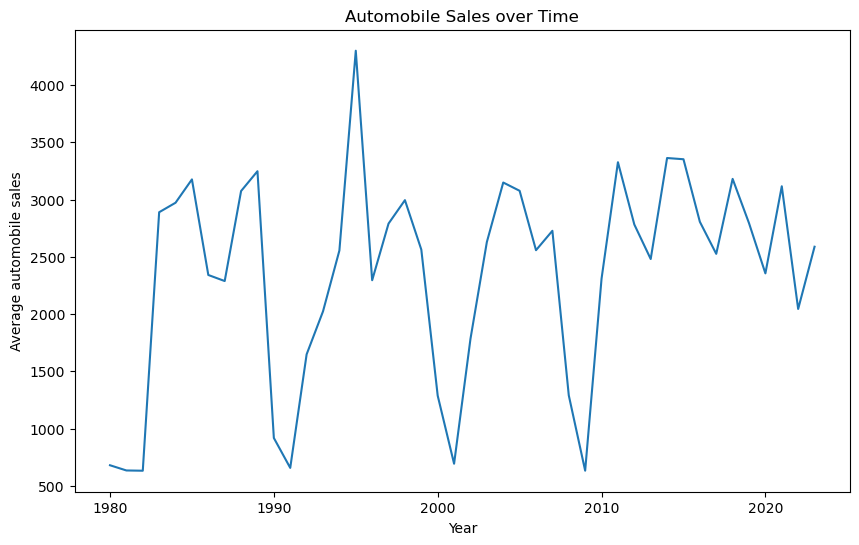

In [5]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average automobile sales')
plt.title('Automobile Sales over Time')
plt.show()

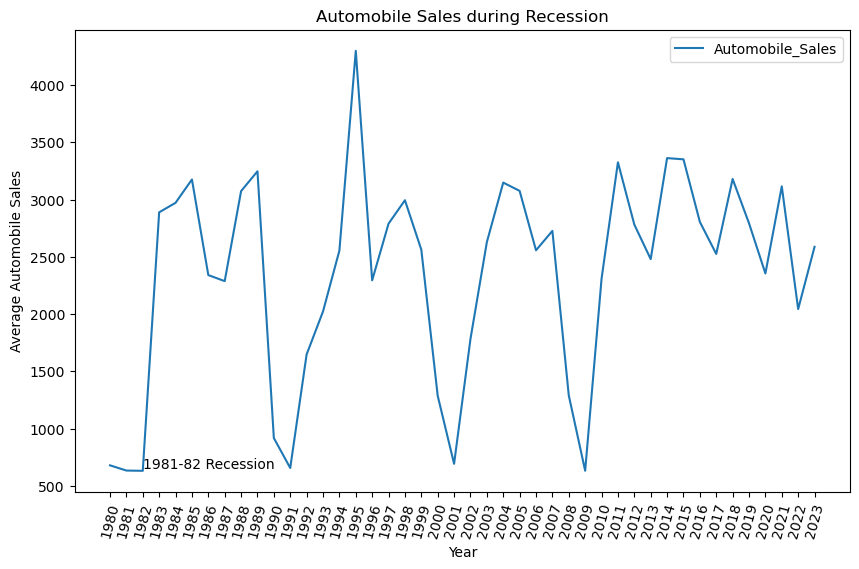

In [6]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.show()

----

----

**TASK 1.2:** Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

**Inference from the Plot:** 
Sports cars and supermini cars demonstrate resilience or growth during recession periods.
Medium family cars and, to a lesser extent, small family cars show more sensitivity to economic changes, 
with less consistent trends.The upward trend in sports vehicles sales indicates the stability of the luxury market, 
even during economic downturns.

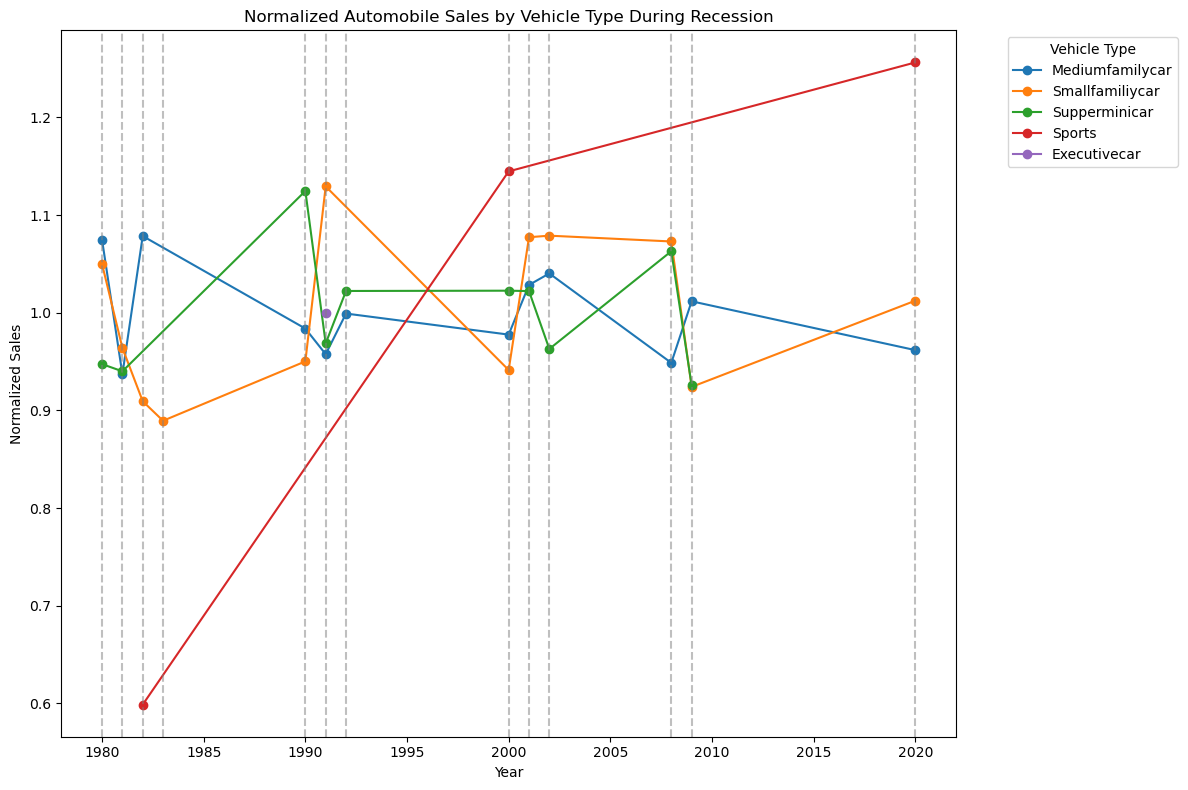

In [7]:
# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

-----

----

**TASK 1.3:** Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

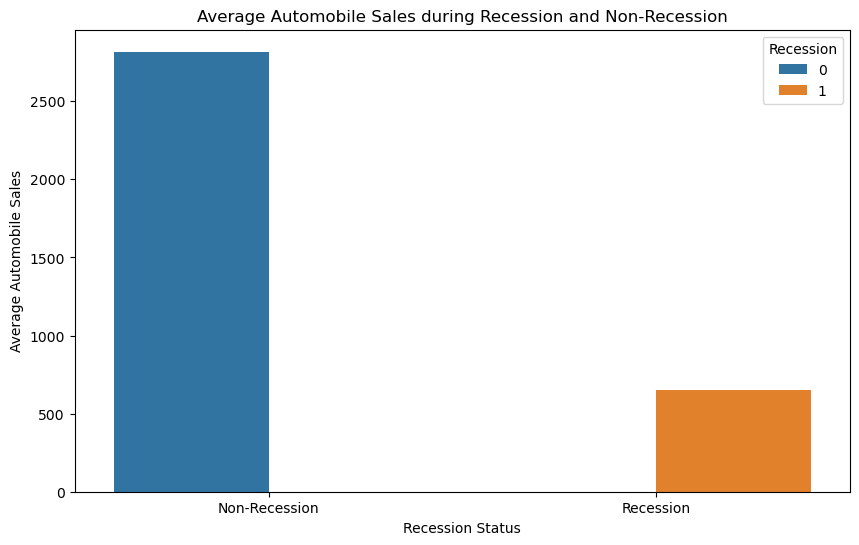

In [8]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession Status')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

**Now we want to compare the sales of different vehicle types during a recession and a non-recession period.**

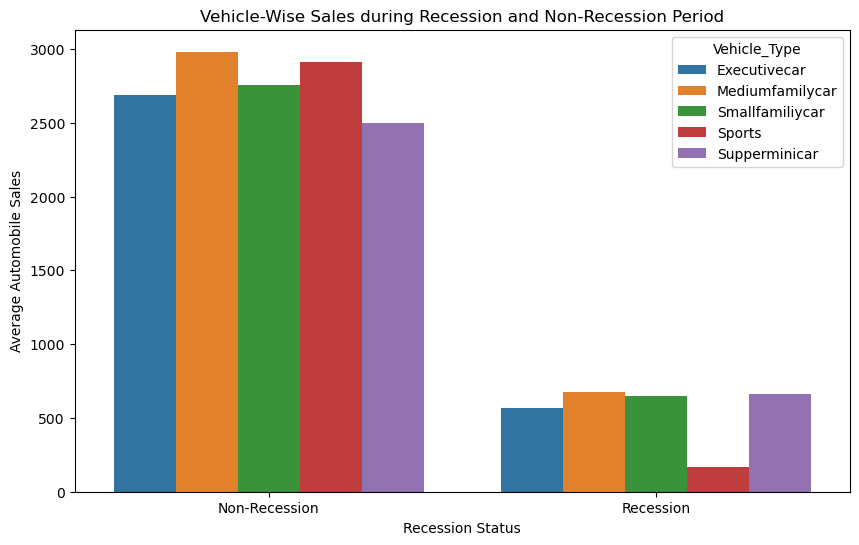

In [9]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Status')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

**Inference fromt the Plot:**
    
From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports


----

----

**TASK 1.4:** Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

Now, you want to find more insights from the data to understand the reason.
Plot a two line charts using subplotting to answer:
    
**How did the GDP vary over time during recession and non-recession periods?**

Make use of add_subplot() from Matplotlib for this comparision.

**Inference:**

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company.

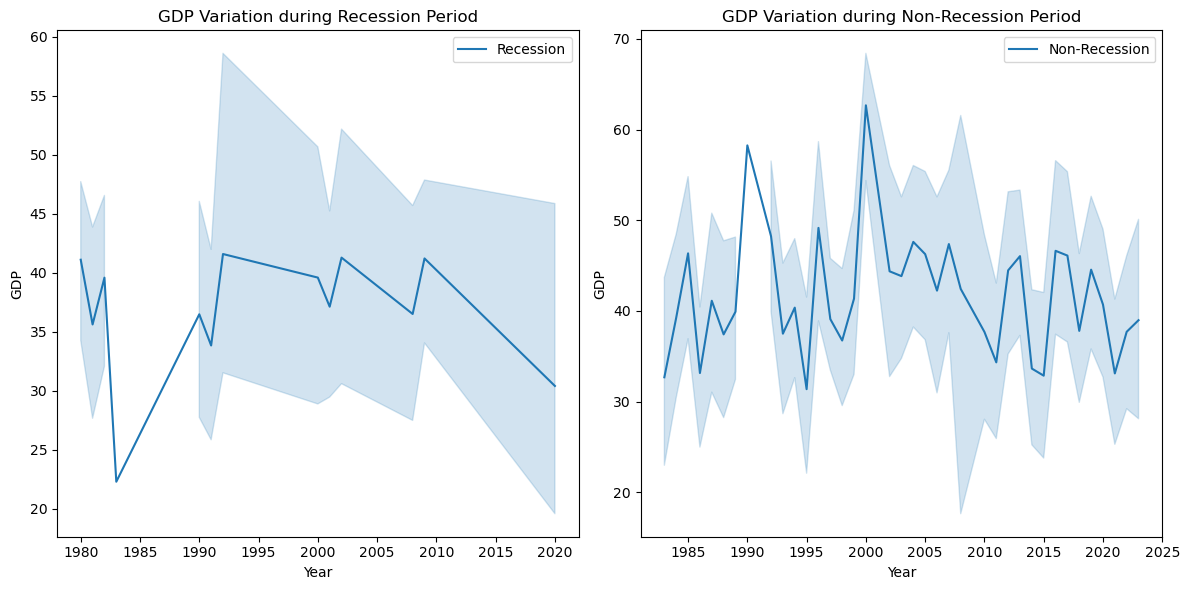

In [10]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

-----

-----

**TASK 1.5:** Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend
Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble

**Inference:**
    
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.


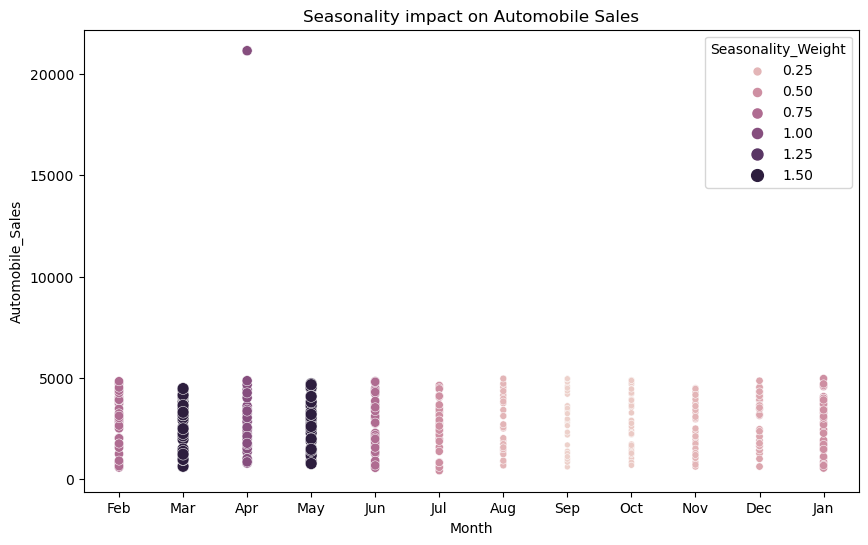

In [11]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect

plt.figure(figsize=(10,6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')
    
#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

----

-----

**TASK 1.6:** Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

**Inference:**
    
There is not much relation!

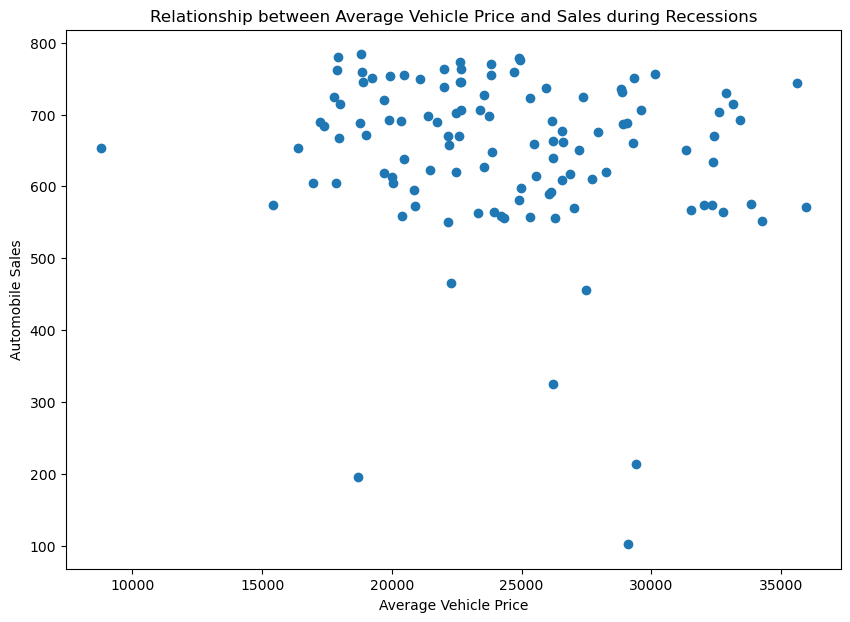

In [12]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(10,7))
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

----

----

**TASK 1.7:** Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

**Inference:**

It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

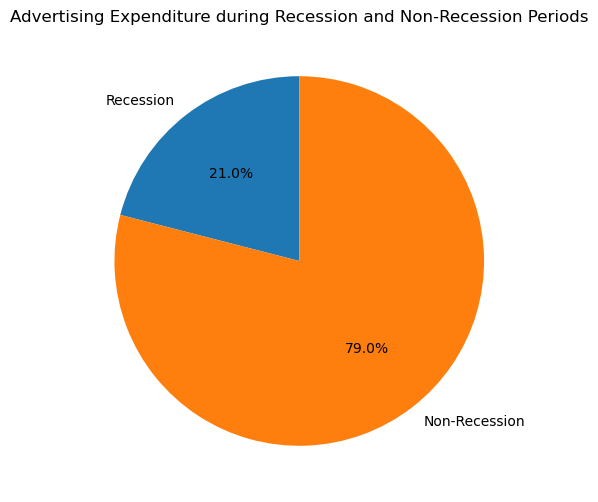

In [13]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

-----

----

**TASK 1.8:** Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
Can we observe the share of each vehicle type in total expenditure during recessions?

**Inference:**

During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

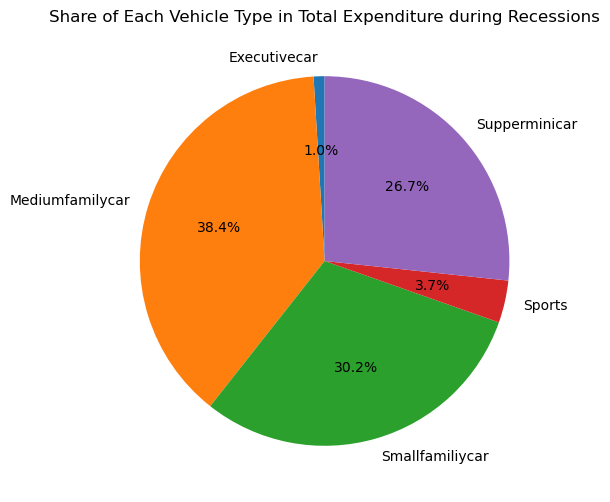

In [14]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()

----

----

**TASK 1.9:** Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'.

**Inference:**
    
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar.

/var/folders/lz/wtmzdv054lx30k7cb60vz9w40000gn/T/ipykernel_32378/763293806.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


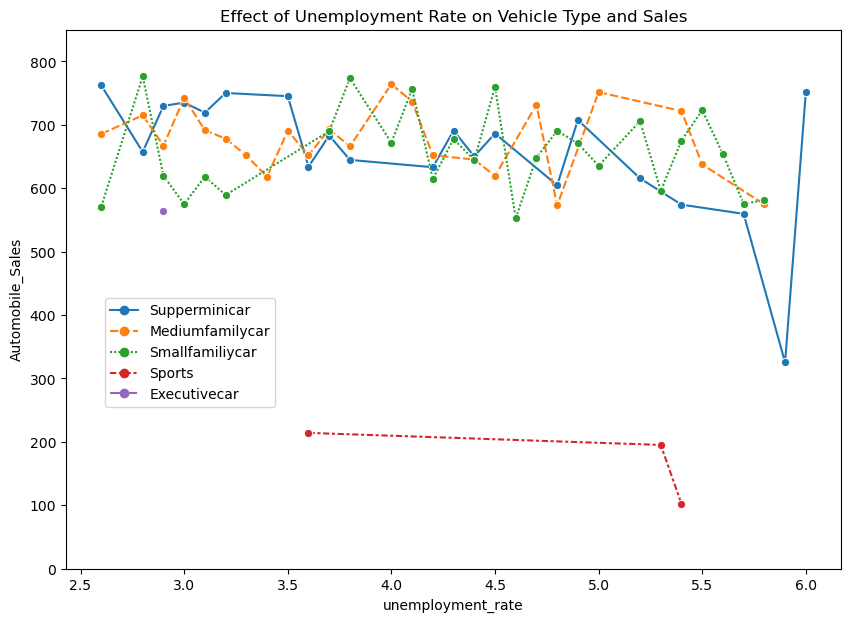

In [15]:
df_rec = df[df['Recession']==1]
plt.figure(figsize=(10,7))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

----

----

**TASK 1.10:** Create a map on the hightest sales region/offices of the company during recession period.
You found that the dataset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth.

In [17]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
    ).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
    )

# Display the map
map1

----